<a href="https://colab.research.google.com/github/chandankr014/passionate/blob/master/livedata_scrap_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scraping data 
#### from yahoo finance

In [178]:
import numpy as np
import pandas as pd
import yfinance as yf


In [179]:
# nifty = yf.download(tickers='^NSEI', period='1d', interval='1m')
# nifty

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader


In [181]:
# For time stamps
from datetime import datetime
company_name = ["NIFTY50", "STATE BANK OF INDIA", "TATA STEEL", "ADANI POWER", "HDFC AMC"]
stk_symbol = ['^NSEI', 'SBIN.NS', 'TATASTEEL.NS', 'ADANIPOWER.NS', 'HDFCAMC.NS']
i_stk = 1
prd = '1mo'
ivl = '5m'
stock_data = yf.download(tickers=stk_symbol[i_stk], period=prd, interval=ivl)


[*********************100%***********************]  1 of 1 completed


In [182]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-03-01 09:15:00+05:30,523.099976,526.500000,523.099976,526.049988,526.049988,0
2023-03-01 09:20:00+05:30,526.049988,527.299988,525.700012,526.599976,526.599976,131784
2023-03-01 09:25:00+05:30,527.750000,528.000000,527.150024,527.150024,527.150024,426363
2023-03-01 09:30:00+05:30,527.299988,528.700012,527.000000,527.700012,527.700012,335973
2023-03-01 09:35:00+05:30,527.750000,528.200012,527.650024,527.900024,527.900024,101892
...,...,...,...,...,...,...
2023-03-28 15:05:00+05:30,507.500000,508.250000,507.049988,507.700012,507.700012,223192
2023-03-28 15:10:00+05:30,507.950012,509.000000,507.500000,507.750000,507.750000,514806
2023-03-28 15:15:00+05:30,507.799988,508.399994,507.200012,508.049988,508.049988,511235


<Axes: xlabel='Datetime'>

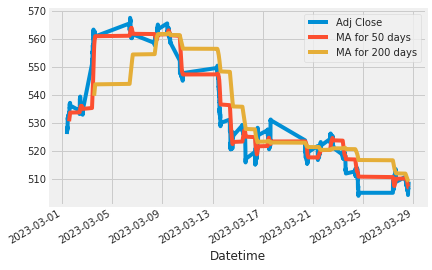

In [183]:
#plotting moving averages
ma_day = [50, 200]

for ma in ma_day:
    for company in stk_symbol:
        column_name = f"MA for {ma} days"
        stock_data[column_name] = stock_data['Adj Close'].rolling(ma).mean()
        

stock_data[['Adj Close', 'MA for 50 days', 'MA for 200 days']].plot()#.set_title(company_name[i_stk])


In [184]:
stock_data.dropna()#.drop(['Volume', 'MA for 50 days', 'MA for 200 days'], axis=1, inplace=True)

,Open,High,Low,Close,Adj Close,Volume,MA for 50 days,MA for 200 days
Datetime,,,,,,,,
2023-03-03 13:20:00+05:30,561.650024,562.000000,561.500000,561.500000,561.500000,183603,557.459000,539.738001
2023-03-03 13:25:00+05:30,561.650024,561.700012,561.000000,561.099976,561.099976,118663,557.660000,539.913251
2023-03-03 13:30:00+05:30,561.099976,562.549988,561.000000,562.400024,562.400024,296138,557.854000,540.092252
2023-03-03 13:35:00+05:30,562.400024,562.500000,561.500000,561.950012,561.950012,135441,558.053000,540.266252
2023-03-03 13:40:00+05:30,561.950012,562.000000,561.099976,561.900024,561.900024,139858,558.277001,540.437252
...,...,...,...,...,...,...,...,...
2023-03-28 15:05:00+05:30,507.500000,508.250000,507.049988,507.700012,507.700012,223192,506.911001,509.160750
2023-03-28 15:10:00+05:30,507.950012,509.000000,507.500000,507.750000,507.750000,514806,506.891001,509.144500
2023-03-28 15:15:00+05:30,507.799988,508.399994,507.200012,508.049988,508.049988,511235,506.887001,509.125000


In [185]:
p_change = stock_data['Adj Close'].pct_change()
stock_data['Daily Return'] = p_change
print(stock_data['Daily Return'])

Datetime
2023-03-01 09:15:00+05:30         NaN
2023-03-01 09:20:00+05:30    0.001046
2023-03-01 09:25:00+05:30    0.001045
2023-03-01 09:30:00+05:30    0.001043
2023-03-01 09:35:00+05:30    0.000379
                               ...   
2023-03-28 15:05:00+05:30    0.000493
2023-03-28 15:10:00+05:30    0.000098
2023-03-28 15:15:00+05:30    0.000591
2023-03-28 15:20:00+05:30    0.000295
2023-03-28 15:25:00+05:30    0.001574
Name: Daily Return, Length: 1425, dtype: float64


Text(0.5, 1.0, 'STATE BANK OF INDIA')

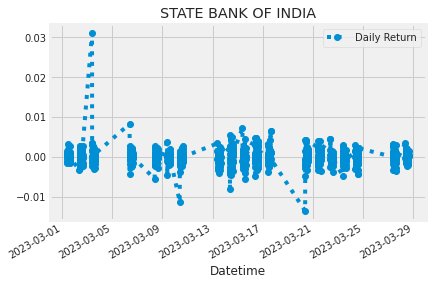

In [186]:
stock_data['Daily Return'].plot(legend=True, linestyle=':', marker='o').set_title(company_name[i_stk])

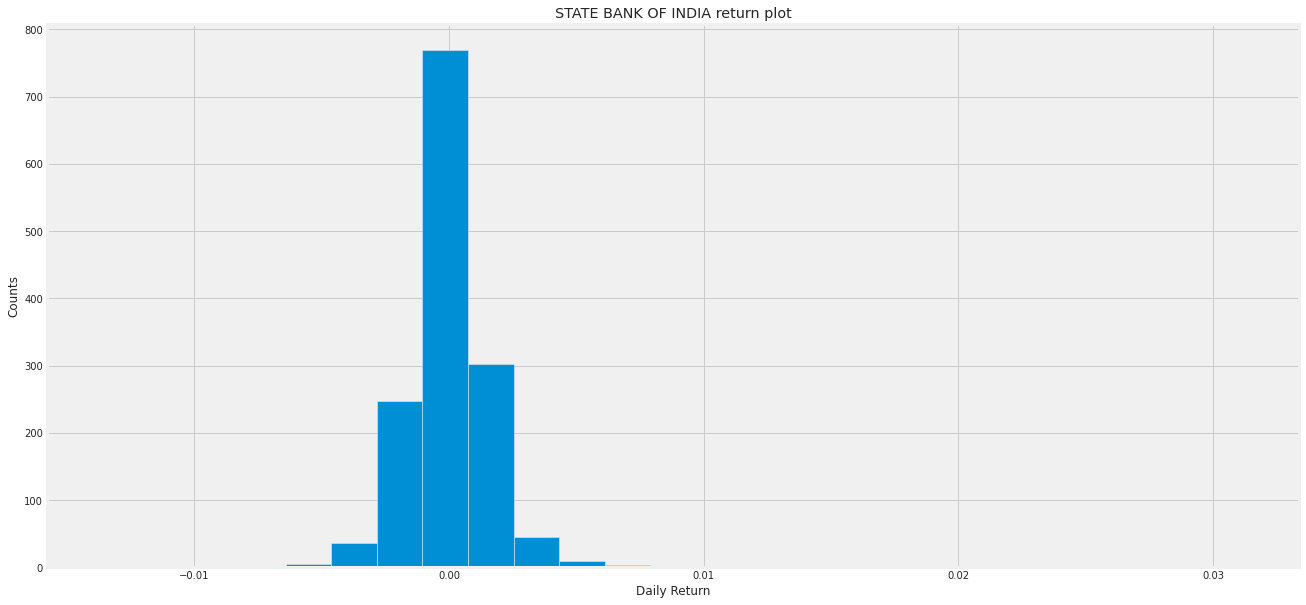

In [187]:
plt.figure(figsize=(20, 10))

stock_data['Daily Return'].hist(bins=25)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title(f'{company_name[i_stk]} return plot')

plt.show()

In [188]:
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume,MA for 50 days,MA for 200 days,Daily Return
Datetime,,,,,,,,,
2023-03-28 15:05:00+05:30,507.500000,508.250000,507.049988,507.700012,507.700012,223192,506.911001,509.16075,0.000493
2023-03-28 15:10:00+05:30,507.950012,509.000000,507.500000,507.750000,507.750000,514806,506.891001,509.14450,0.000098
2023-03-28 15:15:00+05:30,507.799988,508.399994,507.200012,508.049988,508.049988,511235,506.887001,509.12500,0.000591
2023-03-28 15:20:00+05:30,508.100006,508.750000,507.899994,508.200012,508.200012,331629,506.885001,509.10250,0.000295
2023-03-28 15:25:00+05:30,508.399994,509.399994,507.899994,509.000000,509.000000,419455,506.897001,509.08425,0.001574


In [283]:
dt = stock_data['Adj Close'].tolist()
dt[:4]

[526.0499877929688, 526.5999755859375, 527.1500244140625, 527.7000122070312]

In [284]:
dt_vol = stock_data['Volume'].tolist()
dt_vol[:4]

[0, 131784, 426363, 335973]

In [285]:
norm_dt = [round(float(i) / max(dt), 4) for i in dt]

In [286]:
norm_dt[:10]

[0.9268, 0.9278, 0.9287, 0.9297, 0.9301, 0.9286, 0.93, 0.9297, 0.9302, 0.9308]

In [287]:
# normalizing volume
norm_dt_vol = [round(float(i) / max(dt_vol), 4) for i in dt_vol]

In [288]:
norm_dt_vol[0:10]

[0.0, 0.0522, 0.1689, 0.1331, 0.0404, 0.0396, 0.0365, 0.0454, 0.0497, 0.0489]

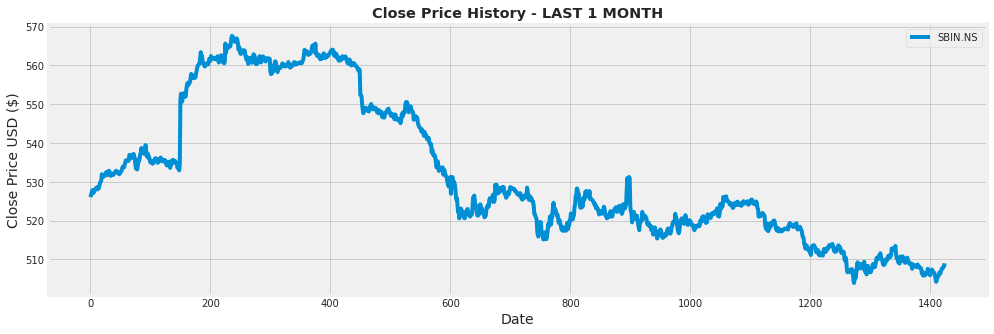

In [289]:
# LAST 1 MONTHS CHART
plt.figure(figsize=(15,5))
plt.title('Close Price History - LAST 1 MONTH', fontweight='bold')
plt.plot(dt[:], label=stk_symbol[i_stk])
plt.legend()
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)
plt.show()

In [290]:
# # LAST 1 MONTHS CHART
# plt.figure(figsize=(15,5))
# plt.title('Volume History - LAST 1 MONTH', fontweight='bold')
# plt.plot(dt[:372], label=stk_symbol[i_stk])
# plt.legend()
# plt.xlabel('Date', fontsize=14)
# plt.ylabel('Volume', fontsize=14)
# plt.show()

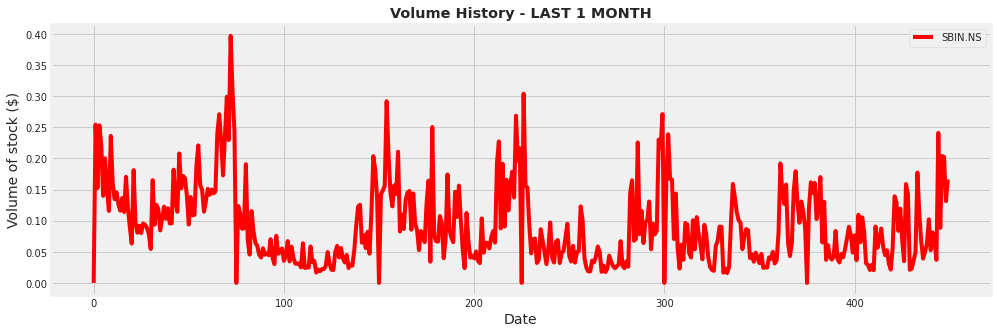

In [291]:
try:
    norm_dt_vol = [round(float(i) / max(dt_vol), 4) for i in dt_vol]
    norm_dt_vol[:5]
    # LAST 1 MONTHS CHART
    plt.figure(figsize=(15,5))
    plt.title('Volume History - LAST 1 MONTH', fontweight='bold')
    plt.plot(norm_dt_vol[-30*15:], label=stk_symbol[i_stk], color='r')
    plt.legend()
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Volume of stock ($)', fontsize=14)
    plt.show()
except ZeroDivisionError:
    print("Division by zero!")

## building model

In [292]:
import pandas

In [293]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [321]:
pr2 = sum(dt[-1000:-1])/1000
pr2 = int(pr2*0.02)

In [322]:
scaler_2 = MinMaxScaler(feature_range=(-pr2,pr2))
scaler_2

MinMaxScaler(feature_range=(-10, 10))

In [323]:
scaler_2_dt = scaler_2.fit_transform(pd.DataFrame(dt_vol))

In [324]:
scaler_2_dt[0:10]

array([[-10.        ],
       [ -8.95587233],
       [ -6.62191611],
       [ -7.33807817],
       [ -9.19270733],
       [ -9.208387  ],
       [ -9.26963196],
       [ -9.09226717],
       [ -9.00568437],
       [ -9.02247326]])

In [327]:
l = len(scaler_2_dt)
l

1425

In [335]:
newdt = dt + scaler_2_dt[0]

In [348]:
scaled_dt = scaler.fit_transform(pandas.DataFrame(dt))


In [350]:
scaled_dt[0:10]

array([[0.34721113],
       [0.35585195],
       [0.36449372],
       [0.37313454],
       [0.37627692],
       [0.36370741],
       [0.37549061],
       [0.37313454],
       [0.37784763],
       [0.38334607]])

In [351]:
r=int(l*0.7)
print(r)
train_data = (scaled_dt[0:r])
test_data  = (scaled_dt[r:])

997


In [352]:
train_data[0:10]

array([[0.34721113],
       [0.35585195],
       [0.36449372],
       [0.37313454],
       [0.37627692],
       [0.36370741],
       [0.37549061],
       [0.37313454],
       [0.37784763],
       [0.38334607]])

In [353]:
print(len(train_data))
print(type(test_data))

997
<class 'numpy.ndarray'>


In [357]:
# convert an array of values into a dataset matrix
import numpy

def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step)]   #i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i+time_step:i+time_step+1])
    return numpy.array(dataX), numpy.array(dataY)

In [358]:
time_step = 20
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [359]:
print(x_train.shape)
print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)

(976, 20, 1)
(976, 1, 1)


In [360]:
# Reshape the data (we reshape only x data not y)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [361]:
x_test.shape
x_train.shape

(976, 20, 1)

In [362]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
976/976 [==============================] - 22s 17ms/step - loss: 0.0027
Epoch 2/10
976/976 [==============================] - 18s 19ms/step - loss: 0.0013
Epoch 3/10
976/976 [==============================] - 17s 17ms/step - loss: 0.0010
Epoch 4/10
976/976 [==============================] - 19s 19ms/step - loss: 6.3445e-04
Epoch 5/10
976/976 [==============================] - 19s 19ms/step - loss: 7.0044e-04
Epoch 6/10
976/976 [==============================] - 17s 18ms/step - loss: 5.9960e-04
Epoch 7/10
976/976 [==============================] - 20s 20ms/step - loss: 6.9731e-04
Epoch 8/10
976/976 [==============================] - 18s 18ms/step - loss: 6.4447e-04
Epoch 9/10
976/976 [==============================] - 17s 17ms/step - loss: 5.1829e-04
Epoch 10/10
976/976 [==============================] - 20s 21ms/step - loss: 6.0396e-04


In [ ]:
y_test[x_test.shape[0]-10:]

In [363]:
# Get the models predicted price values 
predictions = model.predict(x_test)

# RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMS-Error:",rmse)

13/13 [==============================] - 1s 18ms/step
RMS-Error: 0.14030276961349436


In [364]:
predictions.shape
# predictions

(407, 1)

In [365]:
predictions = scaler.inverse_transform(predictions)
predictions[:10]

array([[520.0995 ],
       [521.202  ],
       [520.7569 ],
       [521.1687 ],
       [521.98126],
       [521.72986],
       [522.1529 ],
       [521.82117],
       [520.96893],
       [520.80225]], dtype=float32)

In [366]:
x_test.shape

(407, 20, 1)

In [367]:
const = r+time_step+1
print(const)

1018


In [368]:
valid = pandas.DataFrame(dt[const:l], columns=['StockName'])

In [369]:
valid['Predictions'] = predictions  
valid.set_index(np.arange(const,l,1))

,StockName,Predictions
1018,519.650024,520.099487
1019,520.099976,521.202026
1020,520.950012,520.756897
1021,520.700012,521.168701
1022,521.150024,521.981262
...,...,...
1420,507.700012,508.665314
1421,507.750000,509.096252
1422,508.049988,509.321411
1423,508.200012,509.360382


In [370]:
dt[0]
l

1425

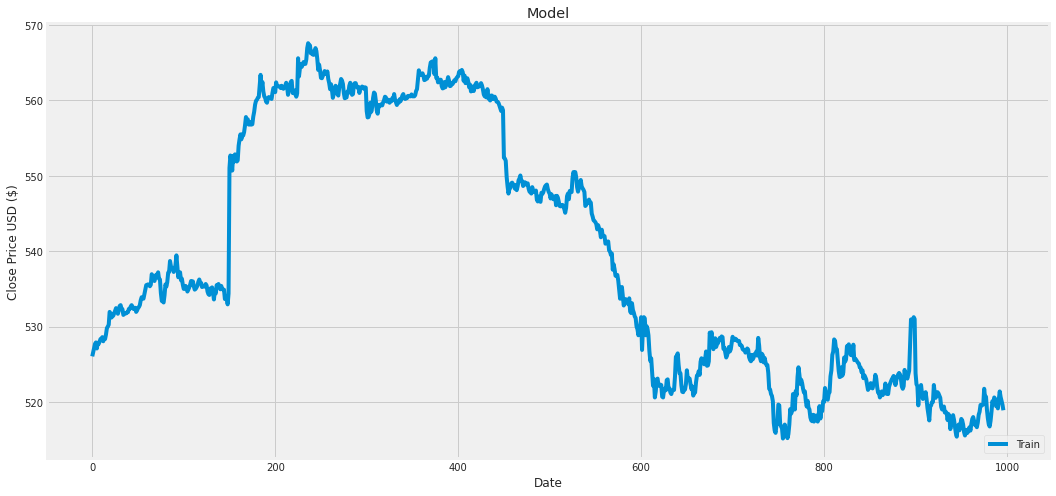

In [371]:
## plotting predictions along with validations
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(dt[0:r])
# plt.plot(valid[['StockName', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

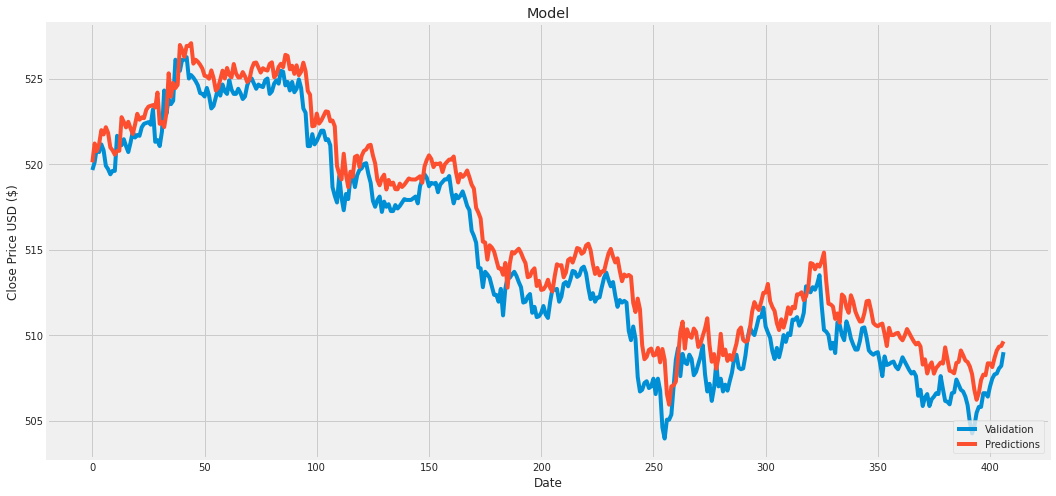

In [372]:
## plotting predictions along with validations
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
# plt.plot(dt[0:r])
plt.plot(valid[['StockName', 'Predictions']])
plt.legend(['Validation', 'Predictions'], loc='lower right')
plt.show()

### predicting future price using the model

In [373]:
y_test.shape

(407, 1, 1)

In [374]:
p = model.predict(y_test)

13/13 [==============================] - 1s 3ms/step


In [375]:
p = scaler.inverse_transform(p)

In [376]:
p.tolist()
[x[0] for x in p.tolist()]

[519.8463134765625,
 519.4271240234375,
 519.8463134765625,
 520.6409301757812,
 520.4068603515625,
 520.8284301757812,
 520.50048828125,
 519.6599731445312,
 519.4736328125,
 519.194580078125,
 519.3805541992188,
 519.3805541992188,
 521.2979125976562,
 521.0630493164062,
 520.781494140625,
 521.1099853515625,
 520.7346801757812,
 520.4068603515625,
 520.9222412109375,
 521.5331420898438,
 521.203857421875,
 521.344970703125,
 521.2979125976562,
 521.7686767578125,
 521.9572143554688,
 522.00439453125,
 522.0515747070312,
 521.9100341796875,
 522.7609252929688,
 520.9691772460938,
 521.0630493164062,
 520.7346801757812,
 521.5331420898438,
 523.8059692382812,
 522.524169921875,
 523.3302612304688,
 523.0453491210938,
 523.2352294921875,
 525.5278930664062,
 525.287841796875,
 524.9044189453125,
 525.5278930664062,
 525.5278930664062,
 525.672119140625,
 524.473876953125,
 524.6651611328125,
 524.5216064453125,
 524.33056640625,
 524.0919189453125,
 523.6631469726562,
 523.615478515625

In [377]:
temp_dict = {"predictions":[x[0] for x in p.tolist()]}

In [378]:
temp_dict['predictions'][0]

519.8463134765625

In [379]:
tt = 372 #372 minutes trade occurs daily
ii = 1

In [380]:
temp_dict_df = pandas.DataFrame(temp_dict['predictions'][0:tt])
temp_dict_df

,0
0,519.846313
1,519.427124
2,519.846313
3,520.640930
4,520.406860
...,...
367,508.800232
368,508.582977
369,507.588043
370,507.890076


In [381]:
i1 = np.arange(0,tt,ii)
i1[:5]

array([0, 1, 2, 3, 4])

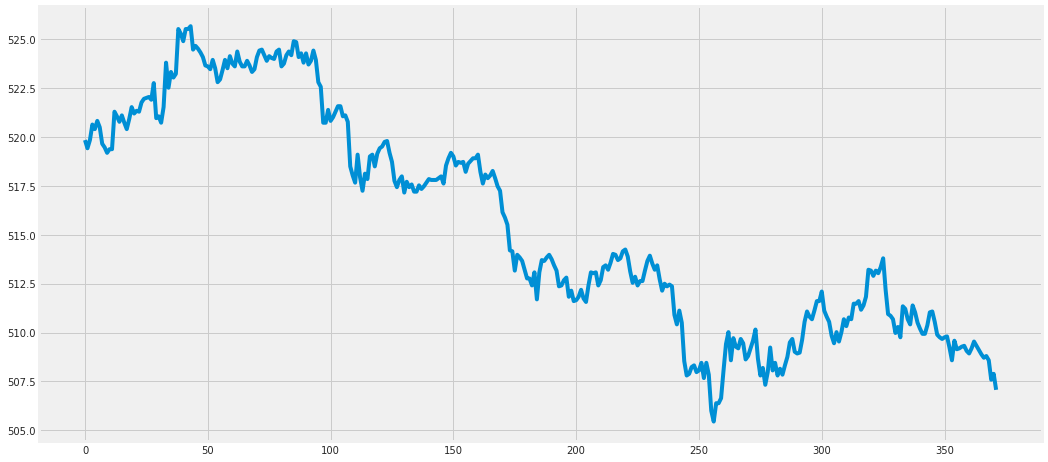

In [382]:
plt.figure(figsize=(16,8))
plt.plot(i1 , temp_dict_df)

In [383]:
stock_data['Adj Close']

Datetime
2023-03-01 09:15:00+05:30    526.049988
2023-03-01 09:20:00+05:30    526.599976
2023-03-01 09:25:00+05:30    527.150024
2023-03-01 09:30:00+05:30    527.700012
2023-03-01 09:35:00+05:30    527.900024
                                ...    
2023-03-28 15:05:00+05:30    507.700012
2023-03-28 15:10:00+05:30    507.750000
2023-03-28 15:15:00+05:30    508.049988
2023-03-28 15:20:00+05:30    508.200012
2023-03-28 15:25:00+05:30    509.000000
Name: Adj Close, Length: 1425, dtype: float64

# Bollinger Band

In [384]:
symbol = stk_symbol[i_stk]
def get_sma(prices, rate):
    return prices.rolling(rate).mean()

In [385]:
#for 20 DMA with 2 std
def get_bollinger_bands(close_price_col, rate=20):
    sma = get_sma(close_price_col, rate)
    std = close_price_col.rolling(rate).std()
    bollinger_up = sma + std * 2 # Calculate top band
    bollinger_down = sma - std * 2 # Calculate bottom band
    return bollinger_up, bollinger_down


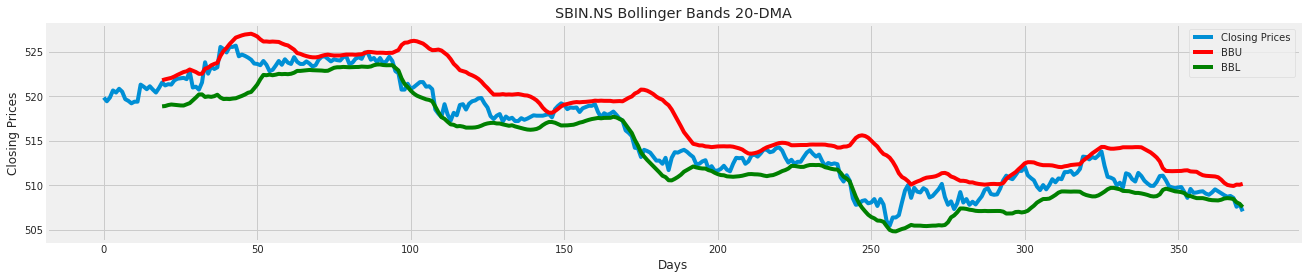

In [386]:
bollinger_up, bollinger_down = get_bollinger_bands(temp_dict_df)

plt.figure().set_figwidth(20)
plt.title(symbol + ' Bollinger Bands 20-DMA')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(temp_dict_df, label='Closing Prices')
plt.plot(bollinger_up, label='BBU', c='red')
plt.plot(bollinger_down, label='BBL', c='green')
plt.legend()
plt.show()

In [387]:
#for 50 DMA with 2.5 std
def get_bollinger_bands_50(close_price_col, rate=50):
    sma = get_sma(close_price_col, rate)
    std = close_price_col.rolling(rate).std()
    bollinger_up = sma + std * 2.5
    bollinger_down = sma - std * 2.5
    return bollinger_up, bollinger_down


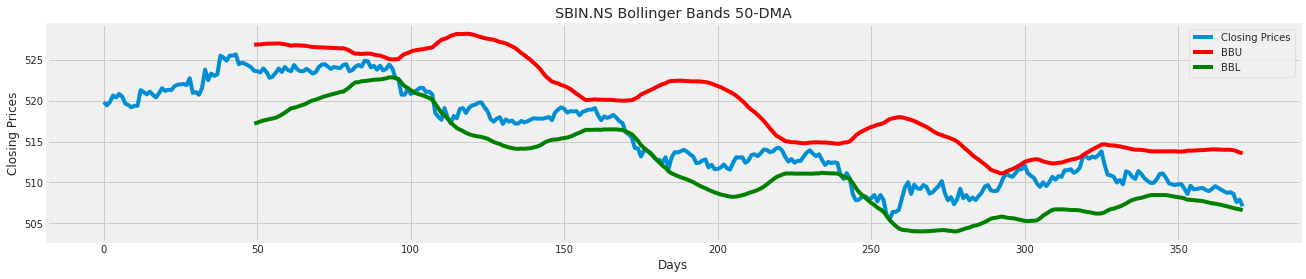

In [388]:
bollinger_up, bollinger_down = get_bollinger_bands_50(temp_dict_df)#.dropna()

plt.figure().set_figwidth(20)
plt.title(symbol + ' Bollinger Bands 50-DMA')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(temp_dict_df, label='Closing Prices')
plt.plot(bollinger_up, label='BBU', c='r')
plt.plot(bollinger_down, label='BBL', c='g')
plt.legend()
plt.show()

    when graph touches red line(bollinger UP)     -> sell
    when graph touches green line(bollinger DOWN) -> buy

In [389]:
# bollinger_down.rename(columns={0:'bbl'})
bollinger_down.fillna(value=1, axis=0, inplace=True)
bollinger_up.fillna(value=1, axis=0, inplace=True)

In [390]:
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data[0])):
        if (data[0][i] > lower_bb[0][i]) and (data[0][i] < lower_bb[0][i]):
            if signal != 1:
                buy_price.append(data[0][i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[0][i] < upper_bb[0][i] and data[0][i] > upper_bb[0][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[0][i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            
    return buy_price, sell_price, bb_signal

buy_price, sell_price, bb_signal = implement_bb_strategy(temp_dict_df, bollinger_down, bollinger_up)



---



---



In [391]:
import datetime

In [392]:
bdown = bollinger_down.mean()
bup = bollinger_up.mean()
bdown,bup

(0    444.490025
 dtype: float64, 0    451.160479
 dtype: float64)

In [393]:
bollinger_down.fillna(value=bdown, inplace=True)
bollinger_up.fillna(value=bup, inplace=True)

In [394]:
print(bollinger_up.iloc[-1][0])
print(temp_dict_df.iloc[-1][0])
print(bollinger_down.iloc[-1][0])
msg1=''
if temp_dict_df.iloc[-1][0] > bollinger_up.iloc[-1][0]:
    msg1 = "buy signal - "+ symbol + " @ " + str(datetime.datetime.now())
    print(msg1)
if temp_dict_df.iloc[-1][0] < bollinger_down.iloc[-1][0]:
    msg1 = "sell signal - "+ symbol + " @ " + str(datetime.datetime.now())
    print(msg1)


513.5780820390063
507.0718078613281
506.5687624434156


In [395]:
import requests

def send_to_telegram(message):
    apiToken = "6227645743:AAFVdG3kyQDFbiQa3AHM8T05Rdu9BacDu2Y"
    chatID = "960358723"
    apiURL = f"https://api.telegram.org/bot{apiToken}/sendMessage?chat_id={chatID}&text={message}"

    try:
        response = requests.post(apiURL, chatID, message)
        print(response.text)
    except Exception as e:
        print(e)

if len(msg1)>0:
    send_to_telegram(msg1)

## RSI
The Relative Strength Index (RSI) is a momentum indicator that describes the current price relative to average high and low prices over a previous trading period. This indicator estimates overbought or oversold status and helps spot trend reversals, price pullbacks, and the emergence of bullish or bearish markets.

# MACD
Moving average convergence/divergence (MACD, or MAC-D) is a trend-following momentum indicator that shows the relationship between two exponential moving averages (EMAs) of a security’s price. The MACD line is calculated by subtracting the 26-period EMA from the 12-period EMA.
The result of that calculation is the MACD line. A nine-day EMA of the MACD line is called the signal line, which is then plotted on top of the MACD line, which can function as a trigger for buy or sell signals. Traders may buy the security when the MACD line crosses above the signal line and sell—or short—the security when the MACD line crosses below the signal line.

In [396]:
def get_macd(df, slow, fast, smooth):
    exp1 = df.ewm(span = fast, adjust = False).mean()
    exp2 = df.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns={'Close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns={'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    frames =  [macd, signal, hist]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df


In [397]:

stk_macd = get_macd(stock_data, 26, 12, 9)
stk_macd.tail()

,Open,High,Low,macd,Adj Close,Volume,MA for 50 days,MA for 200 days,Daily Return,Open,High,Low,signal,Adj Close,Volume,MA for 50 days,MA for 200 days,Daily Return,hist
Datetime,,,,,,,,,,,,,,,,,,,
2023-03-28 15:05:00+05:30,-0.060490,0.063491,0.022998,0.051473,0.051473,24219.595932,-0.484987,-0.237759,0.000214,-0.309677,-0.229110,-0.247317,-0.231898,-0.231898,9384.703129,-0.496611,-0.251321,0.000140,0.283371
2023-03-28 15:10:00+05:30,0.068006,0.203956,0.139841,0.139743,0.139743,44721.939207,-0.471700,-0.232762,0.000174,-0.234141,-0.142497,-0.169885,-0.157570,-0.157570,16452.150345,-0.491629,-0.247609,0.000147,0.297312
2023-03-28 15:15:00+05:30,0.155937,0.263818,0.205861,0.231238,0.231238,59990.510842,-0.456233,-0.227750,0.000180,-0.156125,-0.061234,-0.094736,-0.079808,-0.079808,25159.822444,-0.484550,-0.243637,0.000153,0.311046
2023-03-28 15:20:00+05:30,0.246984,0.335633,0.311078,0.312255,0.312255,56941.870261,-0.439075,-0.223023,0.000160,-0.075503,0.018140,-0.013573,-0.001395,-0.001395,31516.232007,-0.475455,-0.239514,0.000155,0.313651
2023-03-28 15:25:00+05:30,0.339434,0.439925,0.389969,0.435988,0.435988,60910.486669,-0.419672,-0.218233,0.000244,0.007484,0.102497,0.067135,0.086081,0.086081,37395.082940,-0.464298,-0.235258,0.000172,0.349907


In [398]:
def implement_macd_strategy(prices, data):    
    buy_price = []
    sell_price = []
    macd_signal = []
    signal = 0

    for i in range(len(data)):
        if data['macd'][i] > data['signal'][i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        elif data['macd'][i] < data['signal'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            macd_signal.append(0)
            
    return buy_price, sell_price, macd_signal
            
buy_price, sell_price, macd_signal = implement_macd_strategy(dt, stk_macd)

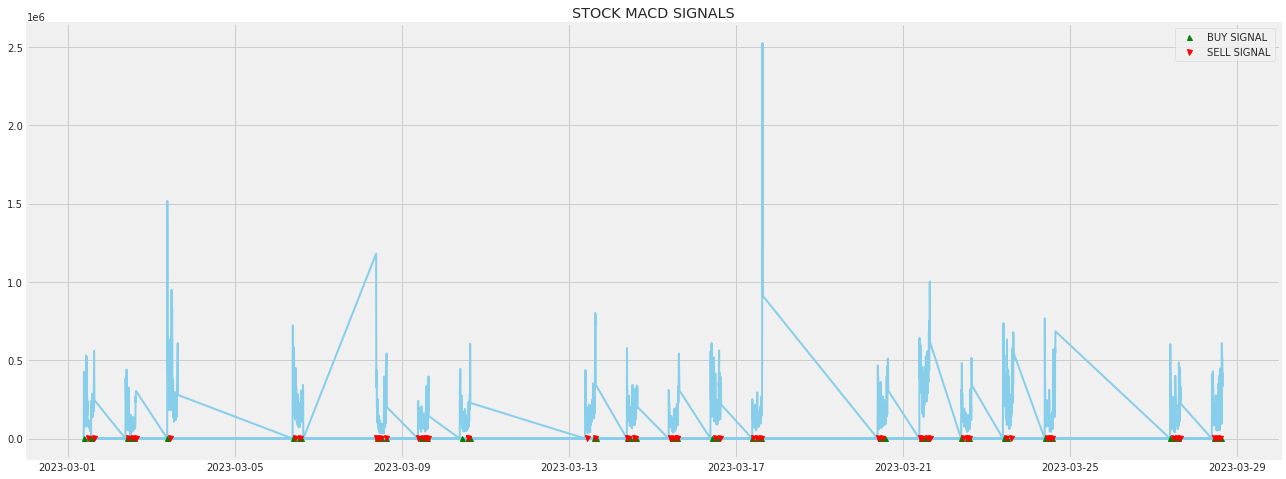

In [399]:
## macd signal plot
plt.figure(figsize=(20,8))
plt.plot(stock_data, color = 'skyblue', linewidth = 2)
plt.plot(stk_macd.index, buy_price, marker = '^', color = 'g', markersize = 5, label = 'BUY SIGNAL', linewidth = 0)
plt.plot(stk_macd.index, sell_price, marker = 'v', color = 'r', markersize = 5, label = 'SELL SIGNAL', linewidth = 0)
plt.title('STOCK MACD SIGNALS')
plt.legend()
plt.show()


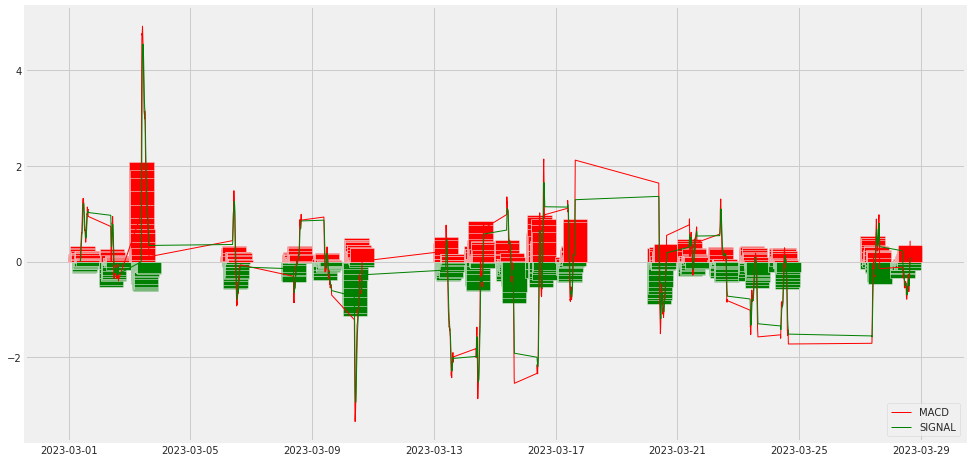

In [400]:
## macd VS signal plotr
plt.figure(figsize=(15,8))
plt.plot(stk_macd['macd'], color = 'red', linewidth = 1, label = 'MACD')
plt.plot(stk_macd['signal'], color = 'green', linewidth = 1, label = 'SIGNAL')

for i in range(len(stk_macd)):
    if str(stk_macd['hist'][i])[0] == '-':
        plt.bar(stk_macd.index[i], stk_macd['hist'][i], color = 'green')
    else:
        plt.bar(stk_macd.index[i], stk_macd['hist'][i], color = 'red')

plt.legend(loc = 'lower right')
plt.show()